Title: Task 3P **Working with numpy Vectors (Unidimensional Data)** <br> Name: **HARPREET SINGH** <br>Student Number: **223925166**<br> Email : **yashu.harpreet@gmail.com**

This task involves using of **numpy** python class which  can be used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.<br>We are using numpy on two datasets from the National Health and Nutrition Examination Survey (NHANES dataset) that
give body measurements of adult males and females.<br>
• **nhanes_adult_male_bmx_2020.csv,<br>
• nhanes_adult_female_bmx_2020.csv.**

<br>

Staring with all the importing for necessary python libraries :<br>**numpy**- for manipulating and performing operation on arrays<br>**scipy** for scientific computing<br>**matplotlib** for plotting data on graphs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

<br>

Using **np.genfromtxt** function from numpy,Both the datasets are loaded into the memory

In [2]:
nhanes_female_bmx = np.genfromtxt('nhanes_adult_female_bmx_2020.txt',delimiter=',')
nhanes_male_bmx = np.genfromtxt('nhanes_adult_male_bmx_2020.txt',delimiter=',')

In [3]:
nhanes_female_bmx

array([[ 97.1, 160.2,  34.7, ...,  35.8, 126.1, 117.9],
       [ 91.1, 152.7,  33.5, ...,  38.5, 125.5, 103.1],
       [ 73. , 161.2,  37.4, ...,  31.8, 106.2,  92. ],
       ...,
       [ 73. , 159.6,  36.2, ...,  31.4, 104.6,  99.3],
       [ 78.6, 168.5,  38.1, ...,  36. , 102.4,  98.5],
       [ 82.8, 147.8,  34.8, ...,  39.5, 121.4, 110. ]])

In [4]:
nhanes_male_bmx

array([[ 98.8, 182.3,  42. , ...,  38.2, 108.2, 120.4],
       [ 74.3, 184.2,  41.1, ...,  30.2,  94.5,  86.8],
       [103.7, 185.3,  47. , ...,  32. , 107.8, 109.6],
       ...,
       [108.8, 168.7,  38.6, ...,  33.6, 118. , 114.7],
       [ 79.5, 176.4,  39.5, ...,  31.4,  99.8,  97.1],
       [ 59.7, 167.5,  40.3, ...,  29.2,  90.5,  86.9]])

In [5]:
print(f"Shape of nhanes_male_bmx {nhanes_male_bmx.shape}")
print(f"Shape of nhanes_female_bmx {nhanes_female_bmx.shape}")

Shape of nhanes_male_bmx (4081, 7)
Shape of nhanes_female_bmx (4221, 7)


We can see that both the datasets have 7 columns.The columns are :-<br>**1. weight (kg),<br>
2. standing height (cm),<br>
3. upper arm length (cm),<br>
4. upper leg length (cm),<br>
5. arm circumference (cm),<br>
6. hip circumference (cm),<br>
7. waist circumference (cm).**<br>

Now we are adding another 8th extra column known as **BMI**,known as Body Mass Index<br> BMI measures the **ratio of your height to your weight** to estimate the amount of body fat you have. Healthcare providers calculate BMI by using weight in kilograms (kg) divided by the square of height in meters (m2).

<br>

In [6]:
bmi_females = nhanes_female_bmx[:,0] / ((nhanes_female_bmx[:,1] / 100)**2)
bmi_females = bmi_females.reshape(-1,1)
bmi_males = nhanes_male_bmx[:,0] / ((nhanes_male_bmx[:,1] / 100)**2)
bmi_males = bmi_males.reshape(-1,1)
# bmi_females

nhanes_female_bmx = np.append(nhanes_female_bmx,bmi_females,axis=1)
nhanes_male_bmx = np.append(nhanes_male_bmx,bmi_males,axis=1)

In above calculation, we are extracting the hieght and weigt column from both the datasets and compute the BMI and appending that column in nhanes_male_bmx and nhanes_female_bmx respectively

In [7]:
bmi_females

array([[37.83504078],
       [39.06972037],
       [28.09265496],
       ...,
       [28.65873958],
       [27.68361084],
       [37.90368801]])

In [8]:
bmi_males

array([[29.72922633],
       [21.89825769],
       [30.20145858],
       ...,
       [38.22950988],
       [25.54876826],
       [21.27868122]])

In [9]:
print(f"Shape of nhanes_male_bmx {nhanes_male_bmx.shape}")
print(f"Shape of nhanes_female_bmx {nhanes_female_bmx.shape}")

Shape of nhanes_male_bmx (4081, 8)
Shape of nhanes_female_bmx (4221, 8)


Here the 8th column represents the BMI values for male and female in their respective datasets

<br>

Now ,we are going to represent the male and Female BMI values using two histograms to see the distrbution of each metric.
For this we are using plt.subplot from matplotlib library and plt.hist function to plot the histograms

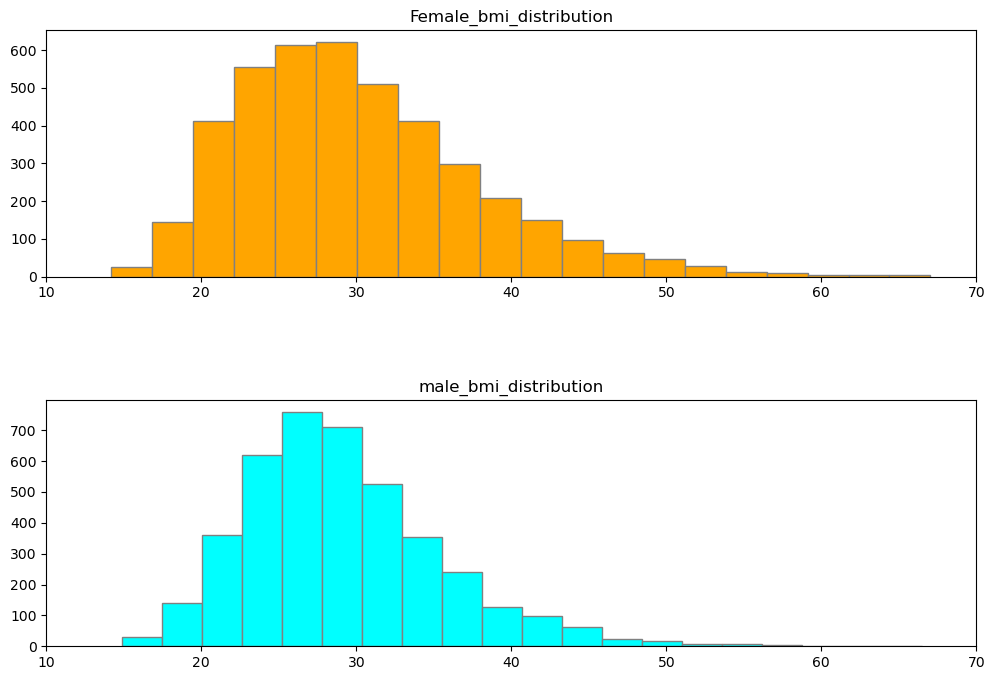

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,8))

plt.subplot(2, 1, 1)
plt.xlim([10, 70])
plt.title("Female_bmi_distribution")
plt.hist(nhanes_female_bmx[:,-1], color = 'orange', edgecolor = 'grey',bins = 20)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.subplot(2, 1, 2)
plt.xlim([10, 70])
plt.title("male_bmi_distribution")
plt.hist(nhanes_male_bmx[:,-1], color = 'cyan', edgecolor = 'grey',bins = 20);

From the above two distributions, It looks that both are **moderately right skewed**. This can be checked further by computing the skewed values for both the metrics. <br>Female BMI has a **more spread (dispersion)** compared to Male BMI

<br>

We are also visualizing the box plot for both the Male and Female BMI on a single plot to compare them.<br>For this we are using plt.boxplot function which uses both the male and female BMI as a two seperate list

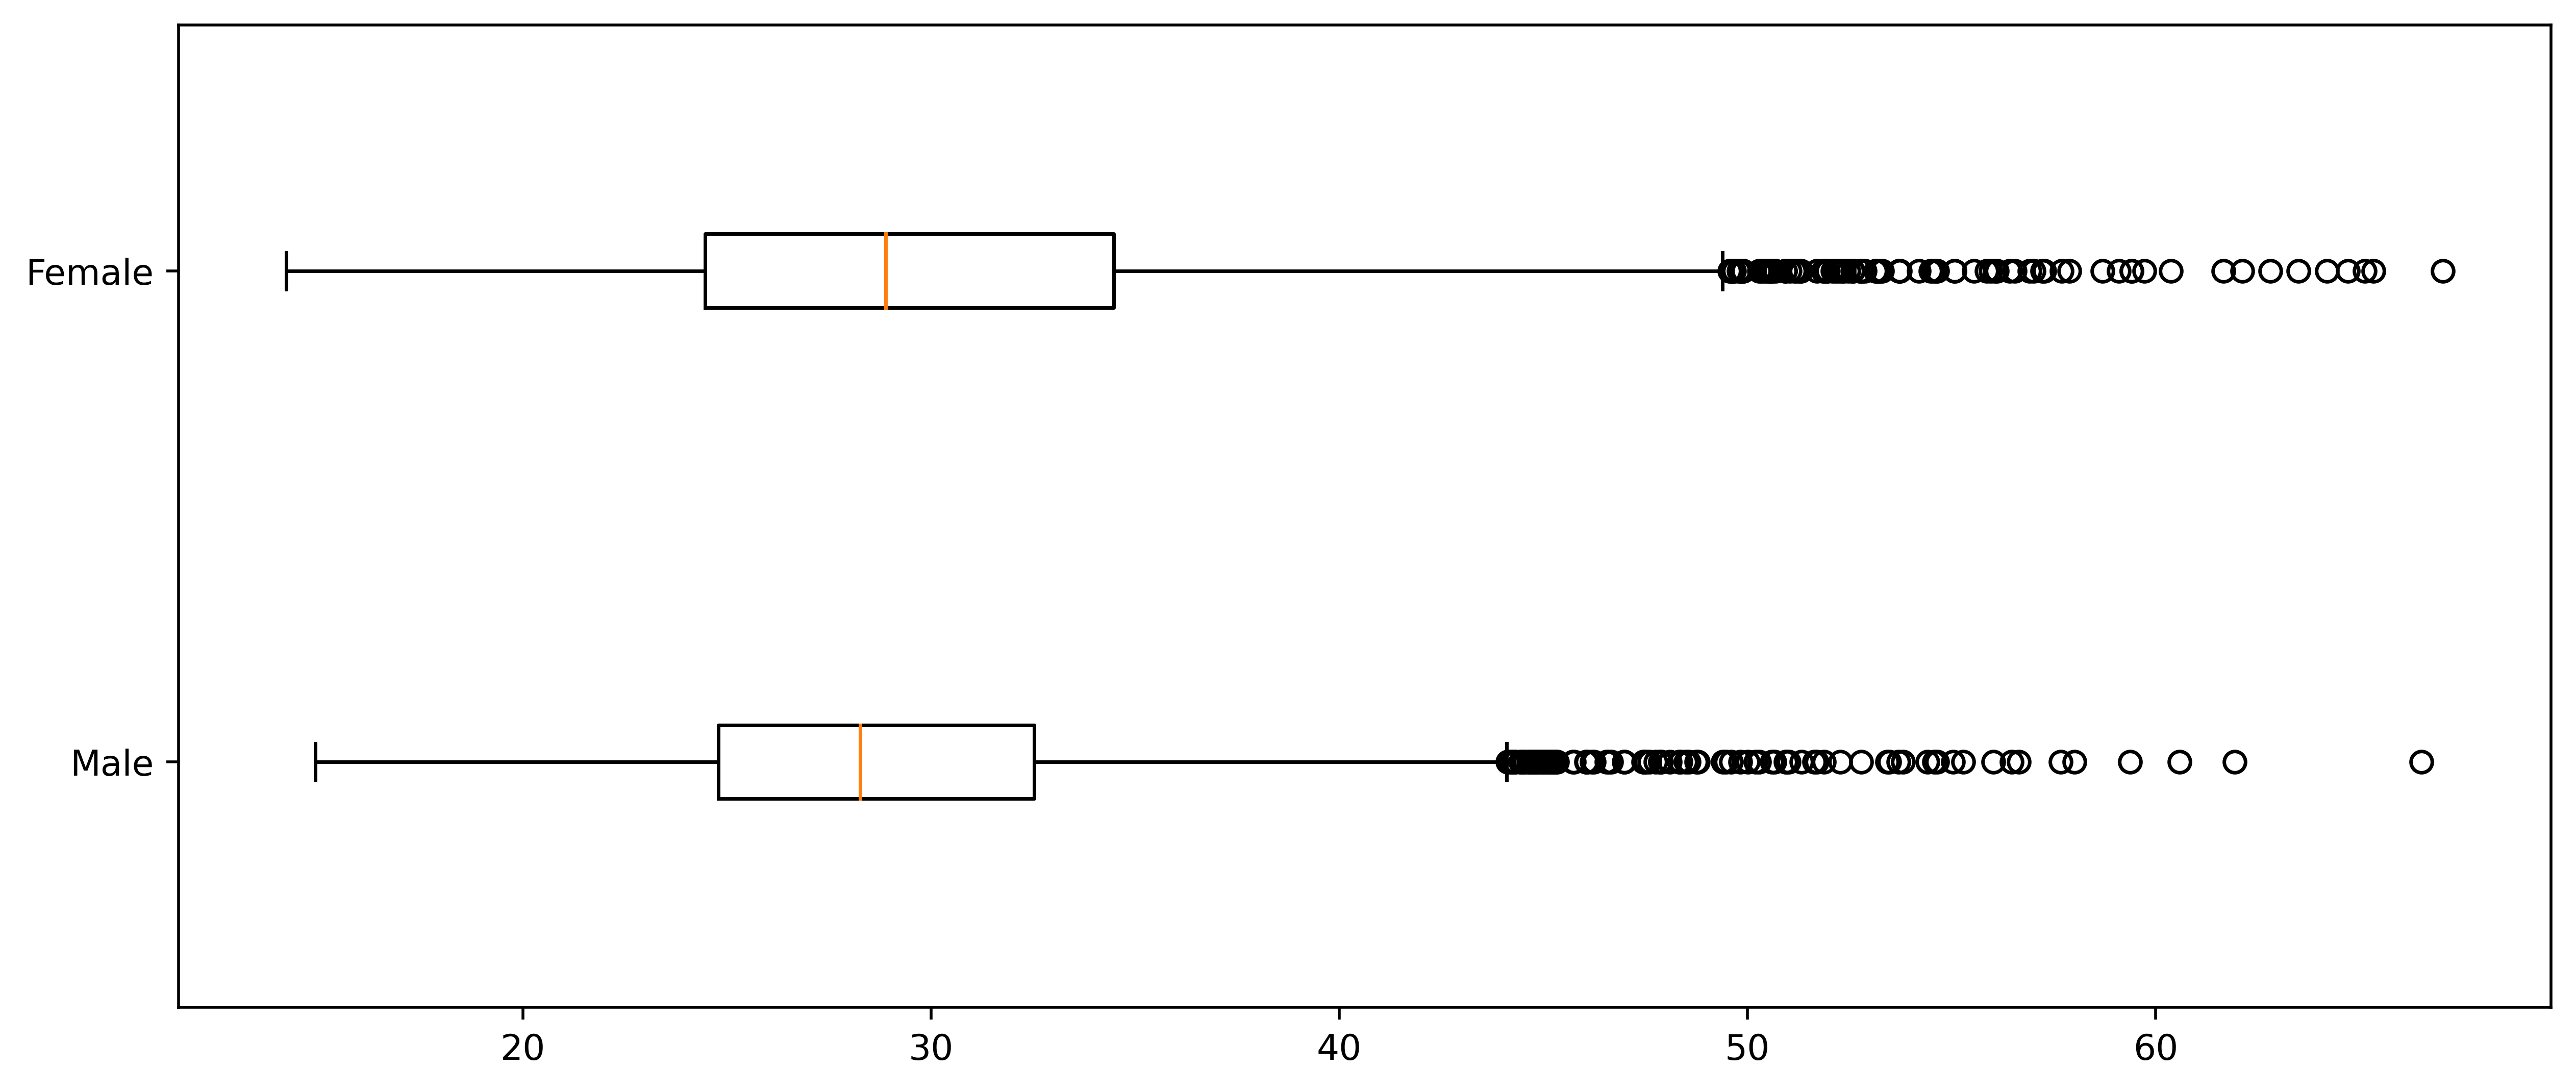

In [11]:
plt.figure(figsize = (12,5),dpi = 500)
plt.boxplot([nhanes_male_bmx[:,-1],nhanes_female_bmx[:,-1]],
           vert=False)
plt.yticks([1, 2], ['Male', 'Female'])
plt.show()

<br><br>

Now , we are calculating various basic numerical aggregates of both male and female BMIs.<br> These are :- <br>mean using **np.mean** method<br>Median using **np.median** <br> Minimum value using **np.min**<br>Maximum using **np.max**<br>STandard deviation using **np.std**<br>IQR using **np.quantile**<br>skewness using **np.skew**

In [12]:
print(f"##{'':8}Female{'':5}Male")
# {name:{10}}
print(f"{'Mean':10}{np.round(np.mean(nhanes_female_bmx[:,-1]),3)}{' ':5}{np.round(np.mean(nhanes_male_bmx[:,-1]),3)}")
print(f"{'Median':10}{np.median(nhanes_female_bmx[:,-1]).round(3)}{' ':5}{np.median(nhanes_male_bmx[:,-1]).round(3)}")
print(f"{'Min':10}{np.min(nhanes_female_bmx[:,-1]).round(3)}{' ':5}{np.min(nhanes_male_bmx[:,-1]).round(3)}")
print(f"{'Max':10}{np.max(nhanes_female_bmx[:,-1]).round(3)}{' ':5}{np.max(nhanes_male_bmx[:,-1]).round(3)}")
print(f"{'std':10}{np.std(nhanes_female_bmx[:,-1]).round(3)}{' ':6}{np.std(nhanes_male_bmx[:,-1]).round(3)}")
print(f"{'IQR':10}{(np.quantile(nhanes_female_bmx[:,-1],0.75) - np.quantile(nhanes_female_bmx[:,-1],0.25)).round(3)}{' ':5}{(np.quantile(nhanes_male_bmx[:,-1],0.75) - np.quantile(nhanes_male_bmx[:,-1],0.25)).round(3)}")
print(f"{'Skew':10}{np.round(stats.skew(nhanes_female_bmx[:,-1]),3)}{' ':6}{np.round(stats.skew(nhanes_male_bmx[:,-1]),3)}")

##        Female     Male
Mean      30.103     29.143
Median    28.885     28.268
Min       14.203     14.911
Max       67.037     66.504
std       7.755      6.312
IQR       10.014     7.729
Skew      0.918      0.97


From above Metrics it is found that :-<br>**Average BMI for female ishigher than males by 1<br>Median values are similar both male and females<br>sStandard Deviation for Female is more than male BMI. This is also visualised in histogram distributions
<br>Minimum and maximu values are also in similar range<br>Skew values for both male and female are greater than 0.5, It shows that they are moderately right skewed.This is also seen when histograms for both are plotted**

<br>

<br>

Now we are plotting the scatterplot matrix of male measurements using pairplot function. For this we are using :- <br>**heights,weights,waist circumference hip circumference and BMI**

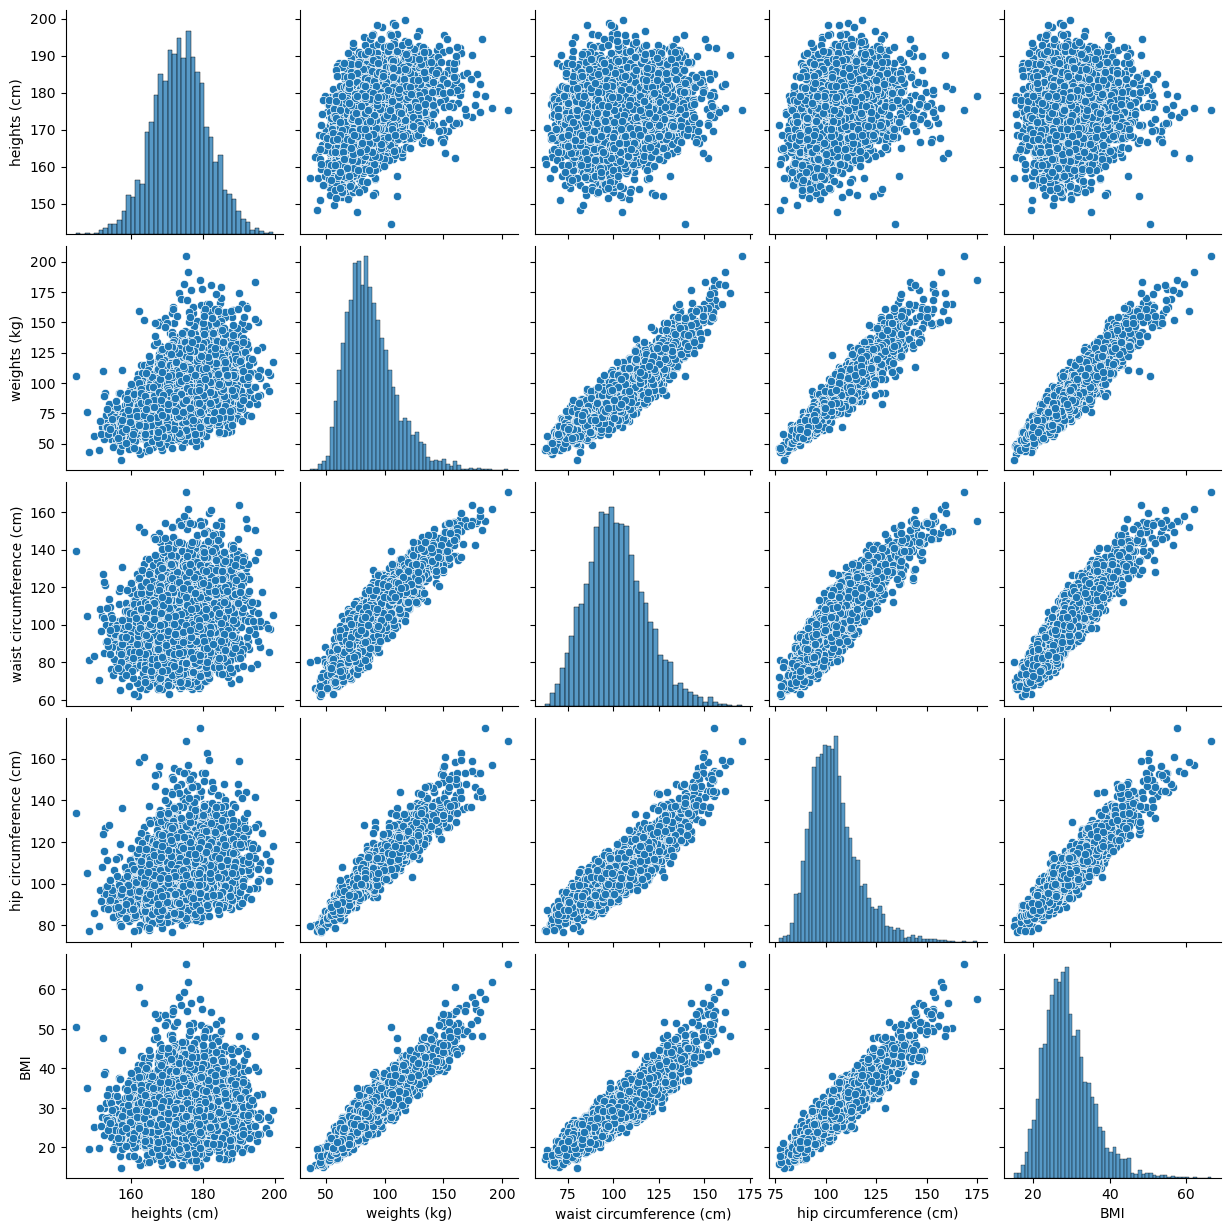

In [13]:

sns.pairplot(data=pd.DataFrame(
    nhanes_male_bmx[:, [1,0,6,5,-1]],
    columns=[
        "heights (cm)", "weights (kg)",
        "waist circumference (cm)", "hip circumference (cm)",
        "BMI"
    ]
))
plt.show()

From above plots It can be concluded that :- <br>
weight has positive correlation with waist circumference, hip circumferenece & BMI. It clearly implies that as waist , hip and BMI increases weight also increases <br> Height also show some positive correlation . This shows that if person has more height, it may have more weight as well

<br><br>

Now to quantifying the above result, we will be computing Pearson’s and Spearman’s correlation coefficients for all pairs of variables<br>To calculate Pearson coefficient, np.corrcoef function is used and to calculate Spearman coefficient,stats.spearmanr from scipy library is used

In [14]:
C = np.corrcoef(nhanes_male_bmx[:, [1,0,6,5,-1]].T)
rho, p_value = stats.spearmanr(nhanes_male_bmx[:, [1,0,6,5,-1]].T, axis=1)

In [15]:
print(f"Pearson coefficient matrix :\n{C}")

Pearson coefficient matrix :
[[1.         0.43415325 0.17573744 0.30223617 0.08040292]
 [0.43415325 1.         0.89894646 0.94190019 0.92936375]
 [0.17573744 0.89894646 1.         0.89469332 0.92423935]
 [0.30223617 0.94190019 0.89469332 1.         0.92459752]
 [0.08040292 0.92936375 0.92423935 0.92459752 1.        ]]


In [16]:
print(f"Spearman coefficient matrix :\n{rho}")

Spearman coefficient matrix :
[[1.         0.43946118 0.16276749 0.32590382 0.07501347]
 [0.43946118 1.         0.88436584 0.94391654 0.91492083]
 [0.16276749 0.88436584 1.         0.87960809 0.92203332]
 [0.32590382 0.94391654 0.87960809 1.         0.90647019]
 [0.07501347 0.91492083 0.92203332 0.90647019 1.        ]]


Now the correlation coefficient matrix will be plotted using heatmaps functionality of seaborn package

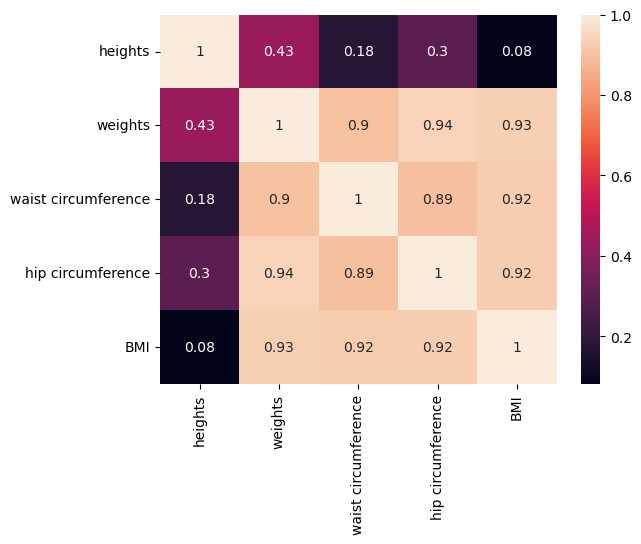

In [17]:
cols = np.array(["heights", "weights", "waist circumference",
    "hip circumference", "BMI"])
sns.heatmap(C,xticklabels=cols,yticklabels = cols,annot = True)
plt.show()

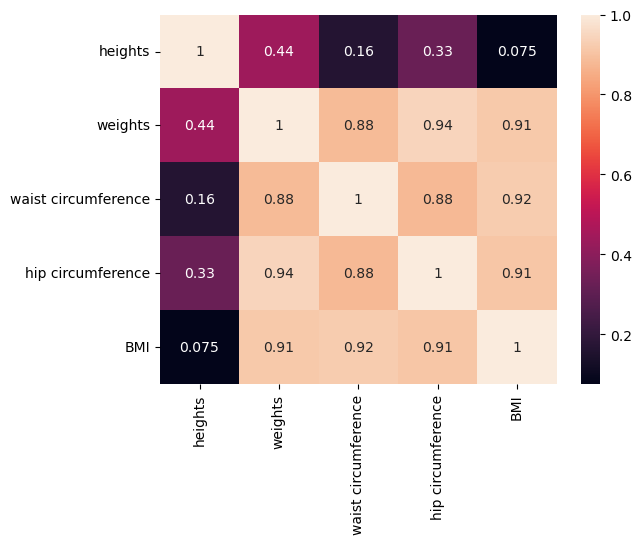

In [18]:
cols = np.array(["heights", "weights", "waist circumference",
    "hip circumference", "BMI"])
sns.heatmap(rho,xticklabels=cols,yticklabels = cols,annot = True)
plt.show()

The values plotted on above heatmaps are also confirmed with values as well as from pairplots drawn above.
From above plots It can be concluded that :- <br>
weight has positive correlation with waist circumference, hip circumferenece & BMI. It clearly implies that as waist , hip and BMI increases weight also increases <br> Height also show some positive correlation . This shows that if person has more height, it may have more weight as well

<br>

In this report, We have used various python libraries to conduct our analysis on the given dataset. We computed various metric using data wrangling, data visualisation.
We also found various statistcal measures which qauntifies the relation between various measurements 